In [32]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const
import scipy.fft as fft
from uncertainties import wrap
from scipy.signal import argrelextrema

In [33]:
with open('Data/Aufg_6.2.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T
for i in range(len(data[1])):
    data[0][i]-= 616800


data = f.channel_to_pos(data,cal)
with open('Data/counts.txt','r') as tf:
    counts = np.genfromtxt(tf).T

In [34]:
data[1] = data[1]*100
yerr = 0.035339825186025027*np.abs(data[1])
print(np.mean(data[2]))

0.0018895178825636732


In [35]:
localmax = argrelextrema(data[1], np.greater,order=30)
localmin = argrelextrema(data[1], np.less,order=25)


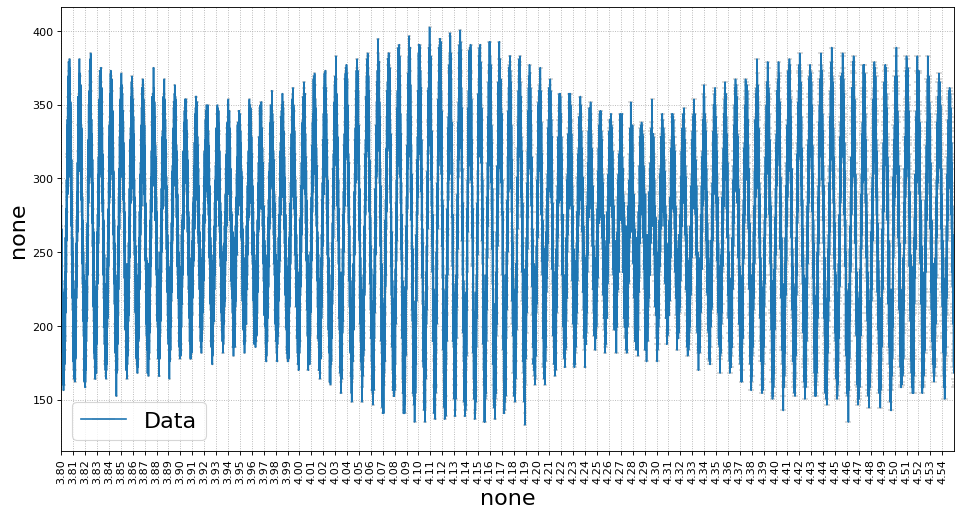

0.0018895178825636732


In [36]:
f.figsize(2)
#fig = plt.figure(figsize=(24,9),dpi=100,linewidth=50)
plt.errorbar(data[0],data[1],xerr=data[2],label = 'Data',ecolor='lightgray')
plt.xticks(np.arange(3.8,4.55,0.01),rotation = 90)
#plt.ylim(12000,20000)
f.form([3.8,4.55])

print(np.mean(np.abs(data[2])))

In [37]:
def lam(von,bis,peaks):
    dist = (((ufloat(bis,0.005)-ufloat(von,0.005))*10**-3)*2)/5.127868608985219
    return dist/peaks


In [38]:

lengths = []
for i in range(len(counts[0])):
    lengths.append(lam(counts[0,i],counts[1,i],counts[2,i]))

lamminus=sum(lengths)/len(lengths)
print(lamminus)
#print(3.391e-6/(sum(lengths)/len(lengths)))

(3.430+/-0.033)e-06


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


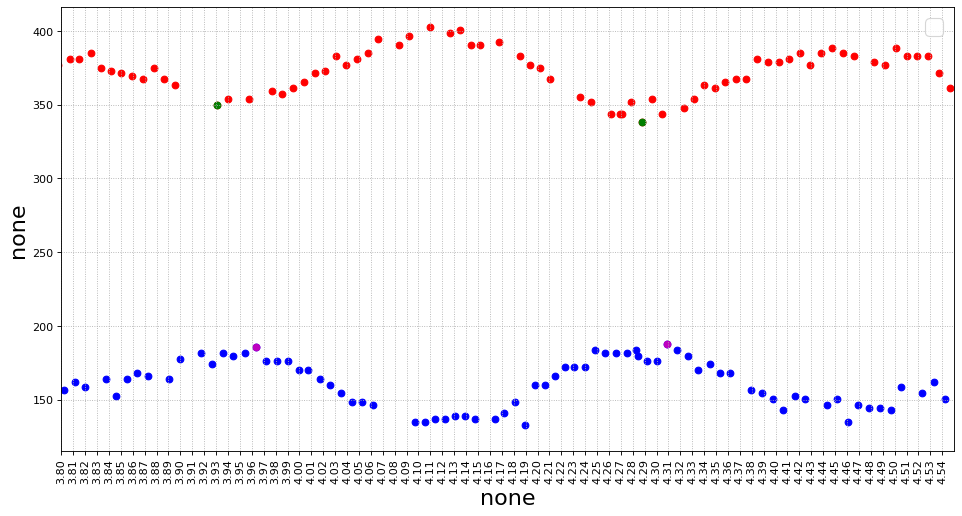

0.0003510+/-0.0000035


In [39]:
f.figsize(2)
plt.scatter(data[0][localmax],data[1][localmax],color='r')
plt.scatter(data[0][localmin],data[1][localmin],color='b')
#fig = plt.figure(figsize=(24,9),dpi=100,linewidth=50)
#plt.errorbar(data[0],data[1],xerr=data[2],label = 'Data',ecolor='lightgray')
plt.xticks(np.arange(3.8,4.55,0.01),rotation = 90)



localminmax = argrelextrema(data[1][localmax], np.less,order=25)
localmaxmin = argrelextrema(data[1][localmin], np.greater,order=30)

plt.scatter(data[0][localmax][localminmax],data[1][localmax][localminmax],color='g')
plt.scatter(data[0][localmin][localmaxmin],data[1][localmin][localmaxmin],color='m')

f.form([3.8,4.55])

delta1 = data[0][localmax][localminmax][-1]-data[0][localmax][localminmax][0]
delta2 = data[0][localmin][localmaxmin][-1]-data[0][localmin][localmaxmin][0]

lamplus= np.mean([ufloat(delta1,0.005),ufloat(delta2,0.005)])*10**-3
print(lamplus)

In [40]:
print(lamplus)
print(lamminus)

lamlaser = (1/(1/(lamminus)+1/(lamplus))).format(':1.10')
lamofen =  (1/(1/(lamminus)-1/(lamplus))).format(':1.10')

print(f'Ofenwellenlänge:{lamlaser}')
print(f'Laserwellenlänge:{lamofen}')

0.0003510+/-0.0000035
(3.430+/-0.033)e-06
Ofenwellenlänge:3.396616878e-06+/-0.032607853e-06
Laserwellenlänge:3.463660443e-06+/-0.033907807e-06
